<a href="https://colab.research.google.com/github/jinay780/python/blob/master/Big_Mart_Sales_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
train=pd.read_csv('Train.csv')
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
test=pd.read_csv('Test.csv')
test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [7]:
data=pd.concat([train,test])
data.shape

(14204, 12)

In [8]:
data.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
dtype: int64

In [14]:
data.Item_Weight=data.Item_Weight.fillna(data.Item_Weight.mean())
data.Item_Outlet_Sales=data.Item_Outlet_Sales.fillna(data.Item_Outlet_Sales.mean())

In [16]:
data['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [17]:
data.Outlet_Size=data.Outlet_Size.fillna('Medium')

In [20]:
data['Item_Identifier'].value_counts()

FDI32    10
DRB25    10
FDC21    10
NCI31    10
FDJ26    10
         ..
FDM52     7
NCL42     7
NCW54     7
FDS22     7
FDX49     7
Name: Item_Identifier, Length: 1559, dtype: int64

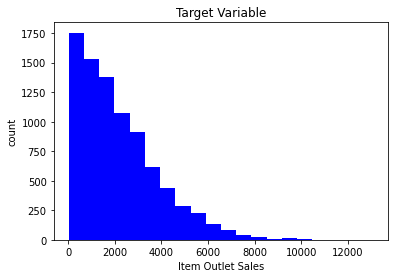

In [24]:
plt.hist(train['Item_Outlet_Sales'], bins = 20, color = 'blue')
plt.title('Target Variable')
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

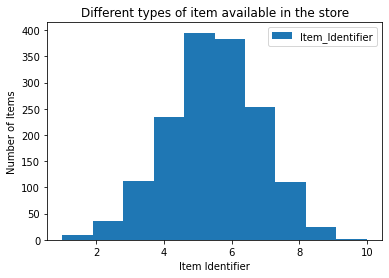

In [25]:
train['Item_Identifier'].value_counts().plot.hist()
plt.title('Different types of item available in the store')
plt.xlabel('Item Identifier')
plt.ylabel('Number of Items')
plt.legend()
plt.show()

In [29]:
data['Item_Fat_Content']=data['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat'})
data['Item_Fat_Content'].value_counts()

Low Fat    9185
Regular    5019
Name: Item_Fat_Content, dtype: int64

In [30]:
data['Item_Identifier']=data['Item_Identifier'].apply(lambda x:x[0:2])
data['Item_Identifier']=data['Item_Identifier'].map({'FD':'Food','NC':'Non_Consumable','DR':'Drinks'})
data['Item_Identifier'].value_counts()

Food              10201
Non_Consumable     2686
Drinks             1317
Name: Item_Identifier, dtype: int64

In [31]:
from sklearn.preprocessing import LabelEncoder
data.apply(LabelEncoder().fit_transform)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1,284,0,1097,4,7567,9,4,1,0,1,2541
1,0,57,1,1436,14,632,3,8,1,2,2,422
2,1,376,0,1172,10,3897,9,4,1,0,1,1639
3,1,393,1,0,6,5626,0,3,1,2,0,670
4,2,265,0,0,9,848,1,1,0,2,1,865
...,...,...,...,...,...,...,...,...,...,...,...,...
5676,1,298,1,718,13,3881,8,2,2,0,1,1692
5677,1,180,1,11820,15,5069,3,8,1,2,2,1692
5678,2,293,0,8009,8,3196,7,5,1,1,1,1692
5679,1,354,1,0,3,6626,2,7,1,1,1,1692


In [33]:
data=pd.get_dummies(data)
data.shape

(14204, 46)

In [35]:
X=data.drop('Item_Outlet_Sales',axis=1)
y=data['Item_Outlet_Sales']

In [38]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(9942, 45)
(9942,)
(4262, 45)
(4262,)


In [73]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_squared_error

In [74]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
pred=model.predict(X_test)

In [76]:
mse = mean_squared_error(y_test, pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, pred))

RMSE : 1053.833367762932
Variance score: 0.34


In [58]:
from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor(n_estimators=100,criterion='mse')
model.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [59]:
pred=model.predict(X_test)

In [61]:
mse = mean_squared_error(y_test, pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, pred))

print("Result :",model.score(X_train, y_train))

RMSE : 1094.0421766874383
Variance score: 0.28
Result : 0.8980820516336978


In [62]:
from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [63]:
pred=model.predict(X_test)

In [72]:
mse = mean_squared_error(y_test, pred)
print("RMSE :",np.sqrt(mse))

RMSE : 1292.424085668515
